# "K Nearest Neighbour from scratch in python"
> "KNN"

- toc: true
- branch: master
- badges: true
- comments: true
- categories: [machine learning, supervised]
- search_exclude: true


Works by looking to the closest data points and predicts based on their output labels. Works both for regression and classification. 

It is lazy learning algorithm as it doesn't learn the function from training data, instead memorizes the training dataset.

The right value is k is important to balance between **over fitting** and **under fitting**

Training examples: $\{x_i, y_i\}$

$x_i$ : features

$y_i$ : class labels

# How KNN works 

[![](https://mermaid.ink/img/eyJjb2RlIjoiZ3JhcGggVERcbiAgICBTcGxpdChTcGxpdCB0cmFpbiB0ZXN0IGRhdGEpIC0tPiBTdG9yZShTdG9yZSB0cmFpbiBkYXRhKVxuXHRTdG9yZSAtLT4gQVtDaG9vc2Ugbm8gb2Yga10gXG5cdHRlc3RfaW5wdXQgLS0-IHxmb3IgZWFjaCBzYW1wbGV8IEJcblx0QS0tPiBCKEZpbmQgbmVhcmVzdCBLIHNhbXBsZXMpXG5cdEIgLS0-IEMoRmluZCBkaXN0YW5jZSBvZiBrIG5laWdoYm91cnMpXG4gICAgQyAtLT4gRChBc3NpZ24gY2xhc3MgbGFiZWwgYnkgbWFqb3JpdHkgdm90ZSlcblxuIiwibWVybWFpZCI6eyJ0aGVtZSI6ImRlZmF1bHQifSwidXBkYXRlRWRpdG9yIjpmYWxzZX0)](https://mermaid-js.github.io/mermaid-live-editor/#/edit/eyJjb2RlIjoiZ3JhcGggVERcbiAgICBTcGxpdChTcGxpdCB0cmFpbiB0ZXN0IGRhdGEpIC0tPiBTdG9yZShTdG9yZSB0cmFpbiBkYXRhKVxuXHRTdG9yZSAtLT4gQVtDaG9vc2Ugbm8gb2Yga10gXG5cdHRlc3RfaW5wdXQgLS0-IHxmb3IgZWFjaCBzYW1wbGV8IEJcblx0QS0tPiBCKEZpbmQgbmVhcmVzdCBLIHNhbXBsZXMpXG5cdEIgLS0-IEMoRmluZCBkaXN0YW5jZSBvZiBrIG5laWdoYm91cnMpXG4gICAgQyAtLT4gRChBc3NpZ24gY2xhc3MgbGFiZWwgYnkgbWFqb3JpdHkgdm90ZSlcblxuIiwibWVybWFpZCI6eyJ0aGVtZSI6ImRlZmF1bHQifSwidXBkYXRlRWRpdG9yIjpmYWxzZX0)

# Distance 

## Euclidean distance

$D\left(x, x^{\prime}\right)=\sqrt{\sum\left|x_{d}-x_{d}^{\prime}\right|^{2}}$

## Hamming Distance

$D\left(x, x^{\prime}\right)=\sum_{d} 1_{x_{d} \neq x_{d}^{\prime}}$

## Minkowski distance

$D\left(x, x^{\prime}\right)=\sqrt[p]{\sum\left|x_{d}-x_{d}^{\prime}\right|^{p}}$



Training Phase: Save the examples

Prediction time: 



In [75]:
# load data
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns

iris = datasets.load_iris()

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


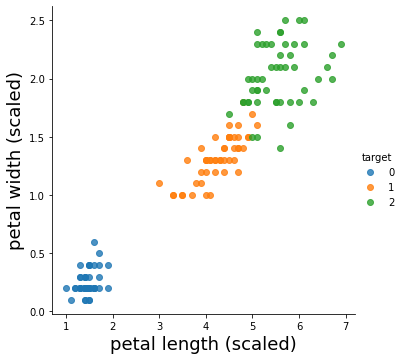

In [76]:
# visualize
sns.lmplot(x='petal length (cm)',y='petal width (cm)',hue='target',data=iris_df, fit_reg=False)
plt.xlabel('petal length (scaled)', fontsize = 18)
plt.ylabel('petal width (scaled)', fontsize = 18)
plt.show()

In [0]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=1234)

In [0]:
# store training samples
def fit(X, y):
  X_train = X
  y_train = y

In [0]:
# Utility Distance calculation 
import numpy as np
def euclidean(x1, x2):
  return np.sqrt(np.sum((x1-x2)**2))

In [0]:
# predict multiple samples
predicted_labels = []
k = 3
def predict(X):
  for x in X:
    # compute distance
    distances = [euclidean(x, x_t) for x_t in X_train]
    # get k nearest samples, labels
    k_indices = np.argsort(distances)[:k] # k nearest indices
    k_nearest_lables = [y_train[i] for i in k_indices]
    # do majority vote
    majority_label = max(set(k_nearest_lables), key = k_nearest_lables.count)
    predicted_labels.append(majority_label)
  return np.array(predicted_labels)

In [0]:
fit(X_train, y_train)

predictions = predict(X_test)

In [100]:
# Calculate Accuracy 

accuracy = np.sum(y_test == predictions) / len(y_test)

accuracy

1.0